MINI PROJECT 1 DATA VISUALIZATION ON Palmer Penguins Dataset

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = pd.read_csv('penguins.csv')
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [222]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [223]:
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


In [224]:
row_na = penguins[penguins['bill_length_mm'].isna()]
row_na

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [225]:
penguins.drop(index=row_na.index, inplace=True)
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,9
year,0


In [226]:
sex_na = penguins[penguins['sex'].isna()]
sex_na

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [227]:
penguins['sex'] = penguins.groupby('species')['sex'].transform(lambda x: x.fillna(x.mode()[0]))
penguins.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0
year,0


In [228]:
penguins['sex'].unique()

array(['male', 'female'], dtype=object)

In [229]:
penguins['sex_bool'] = penguins['sex'].map({'male':0,'female':1})

In [230]:
print(penguins.head())
print(penguins.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  sex_bool  
0       3750.0    male  2007         0  
1       3800.0  female  2007         1  
2       3250.0  female  2007         1  
4       3450.0  female  2007         1  
5       3650.0    male  2007         0  
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_m

In [231]:
print(f'categorical >>',penguins.select_dtypes(include=['object']).columns)
print(f'numerical >>',penguins.select_dtypes(include=['number']).columns)
print(penguins['species'].unique())
print(penguins['island'].unique())
print(penguins['sex'].value_counts())
print(penguins['species'].value_counts())



categorical >> Index(['species', 'island', 'sex'], dtype='object')
numerical >> Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year', 'sex_bool'],
      dtype='object')
['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
sex
male      172
female    170
Name: count, dtype: int64
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


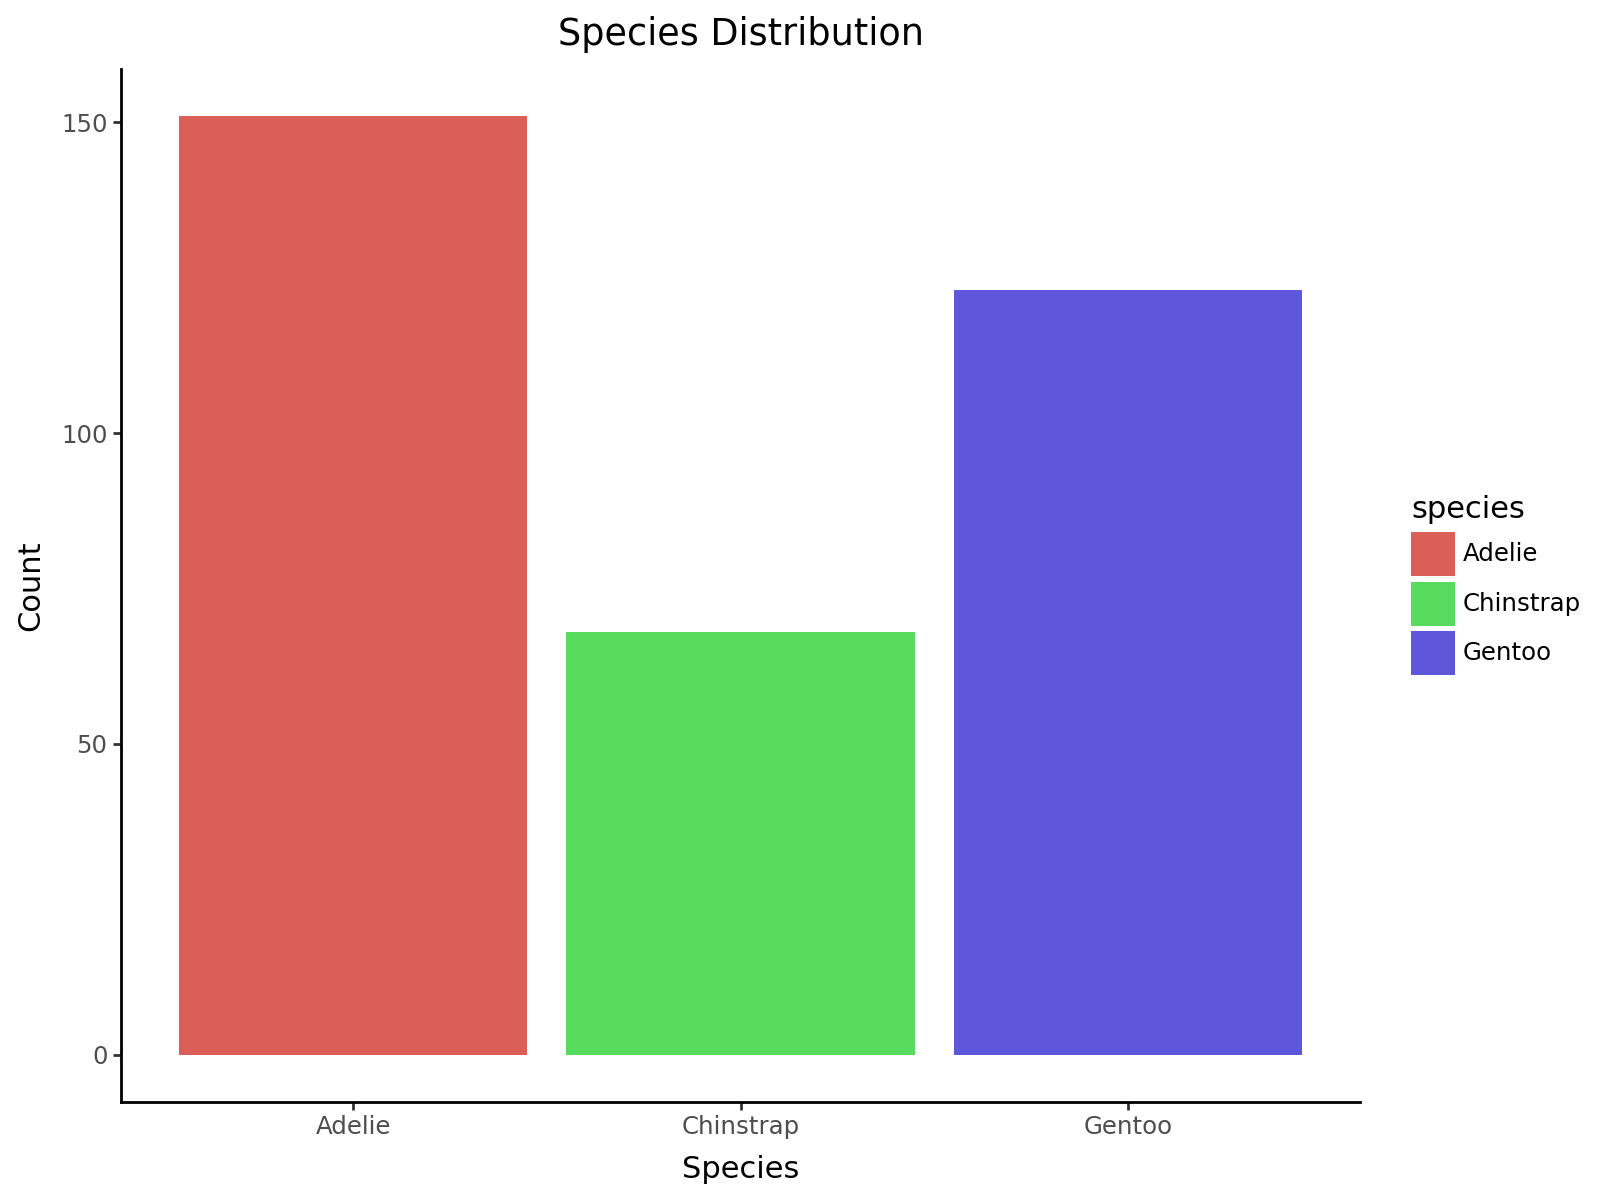

In [232]:
from plotnine import *

bar_plot = (
    ggplot(penguins, aes(x='species', fill='species'))
    + geom_bar()
    + labs(title='Species Distribution',
           x='Species',
           y='Count')
    + theme_classic()
    + theme(figure_size=(8, 6))
)
bar_plot.show()

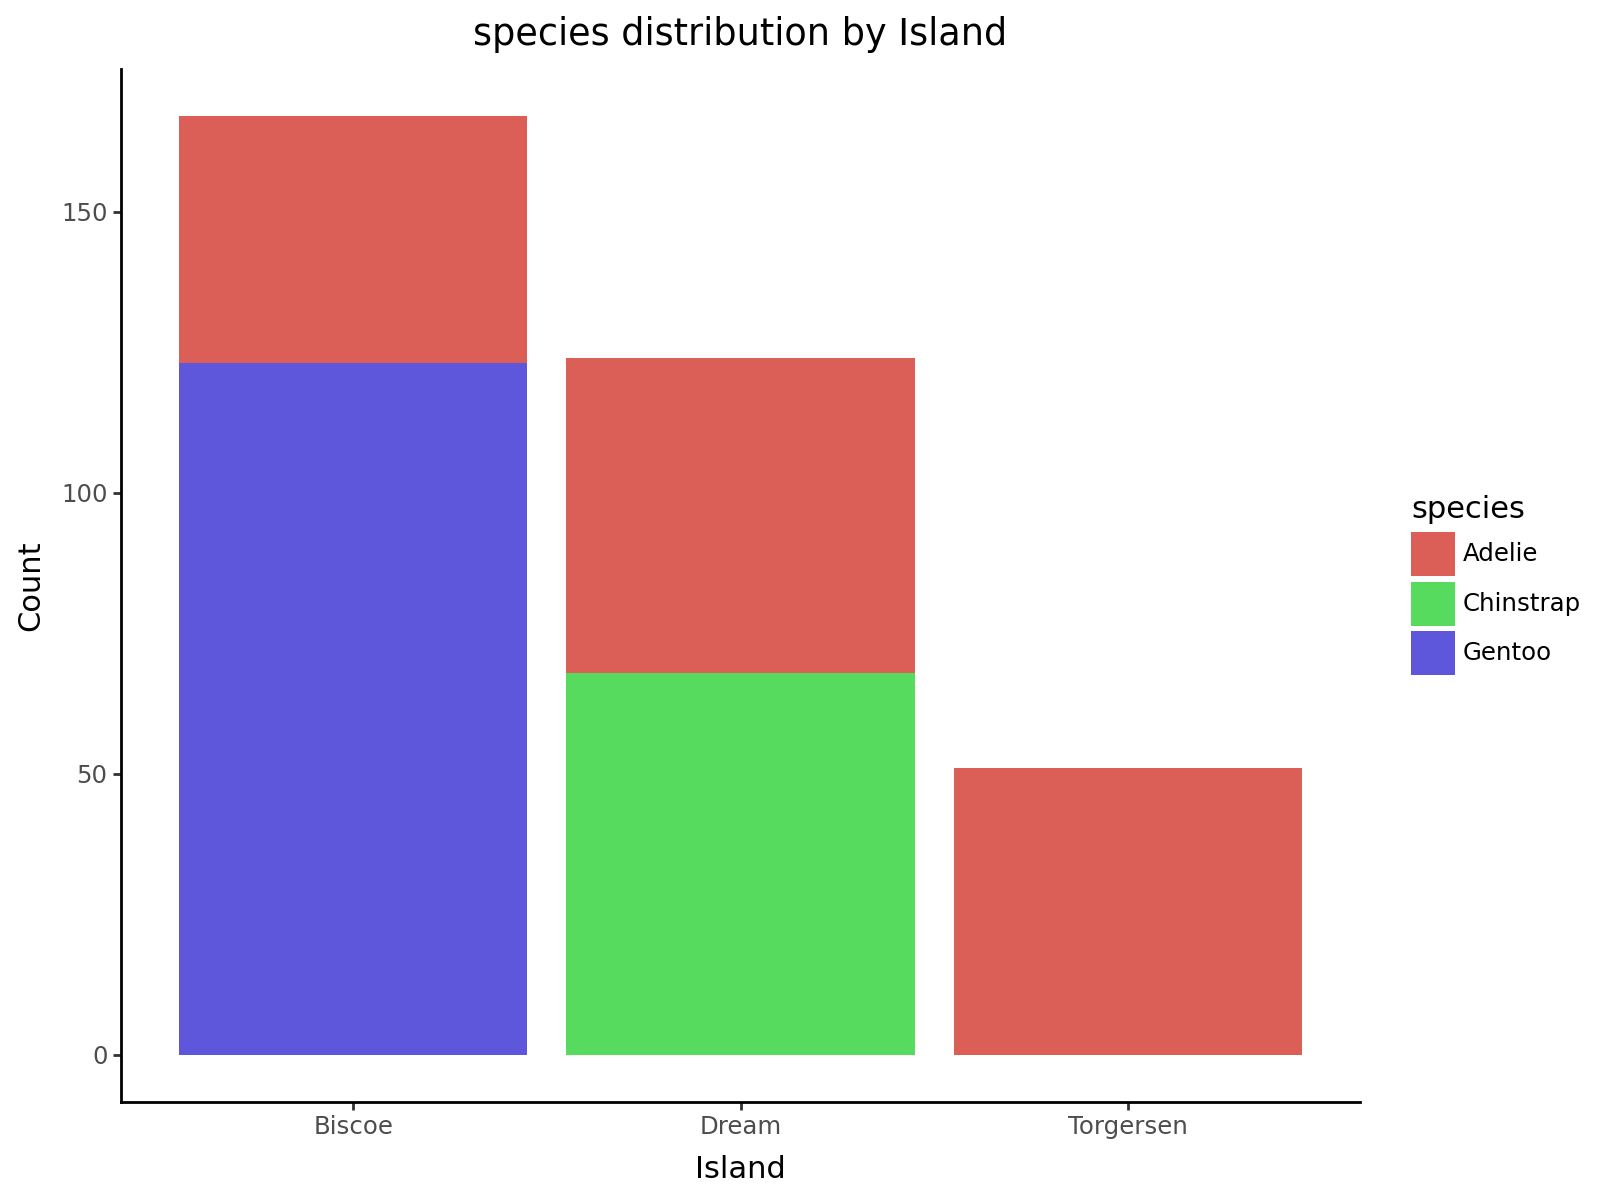

In [233]:
from plotnine import *

bar_plot = (
    ggplot(penguins, aes(x='island', fill='species'))
    + geom_bar()
    + labs(title='species distribution by Island',
           x='Island',
           y='Count')
    + theme_classic()
    + theme(figure_size=(8, 6))
)
bar_plot.show()

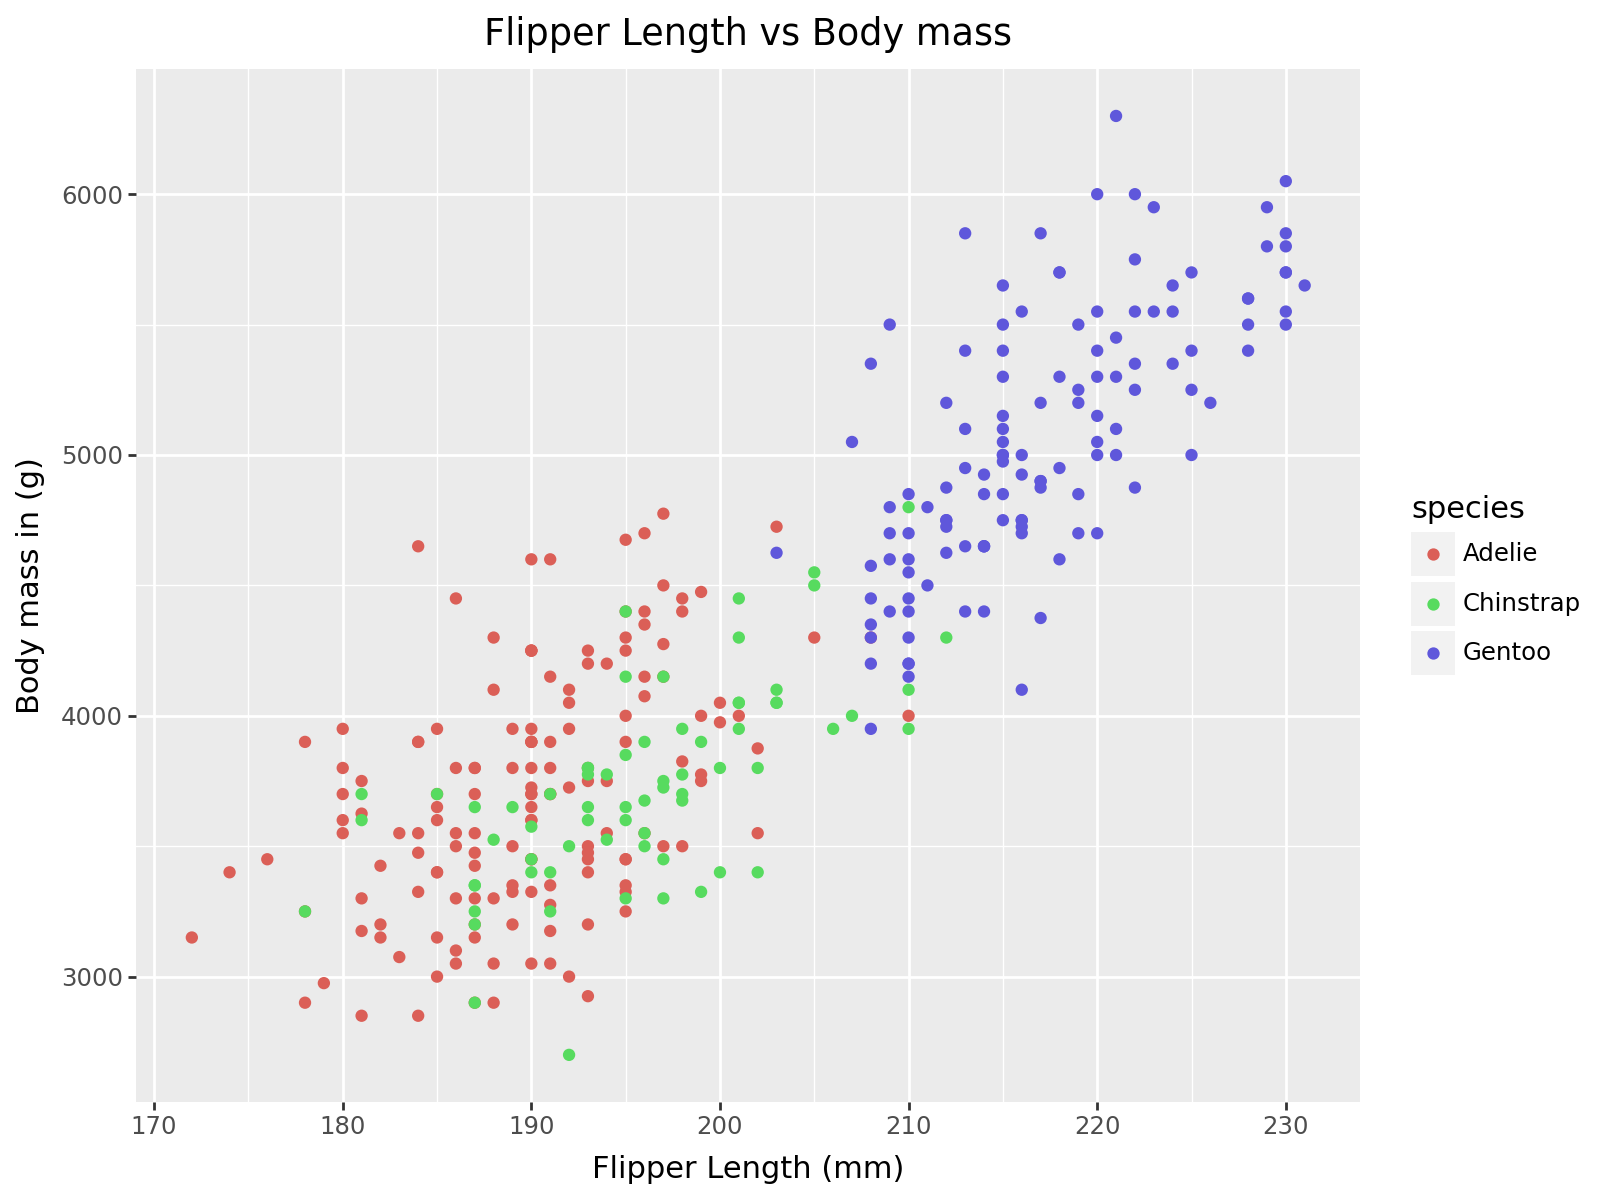

In [234]:
scatter_plot = (
    ggplot(penguins, aes(x='flipper_length_mm', y='body_mass_g', color='species'))
    + geom_point()
    + labs(title='Flipper Length vs Body mass',
           x='Flipper Length (mm)',
           y='Body mass in (g)')
    + theme_grey()
    + theme(figure_size=(8, 6))
)
scatter_plot.show()


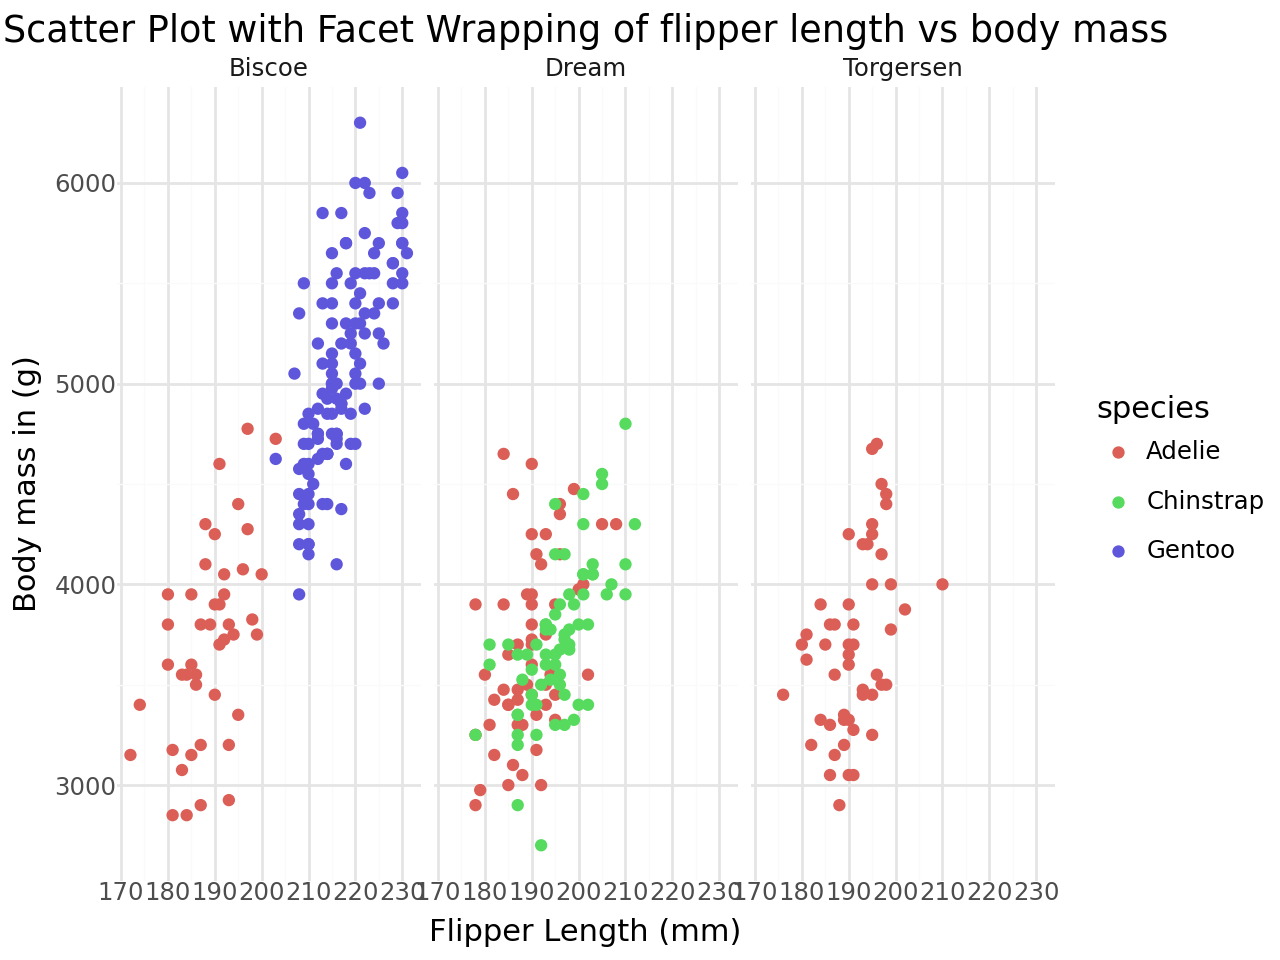

In [235]:
facet_plot = (
    ggplot(penguins, aes(x='flipper_length_mm', y='body_mass_g', color='species'))
    + geom_point()
    + facet_wrap('island')
    + labs(title="Scatter Plot with Facet Wrapping of flipper length vs body mass",
            x='Flipper Length (mm)',
            y='Body mass in (g)')
     + theme(figure_size=(16, 8))
    + theme_minimal()
)

facet_plot.show()

In [236]:
species_colors = {
    'Adelie': '#34255e',
    'Chinstrap': '#bd1362',
    'Gentoo': '#1ab029'
}


fig = px.pie(
    penguins,
    names='species',
    facet_col='island',
    title="Species Distribution by Island",
    color='species',
    color_discrete_map=species_colors

)

fig.show()

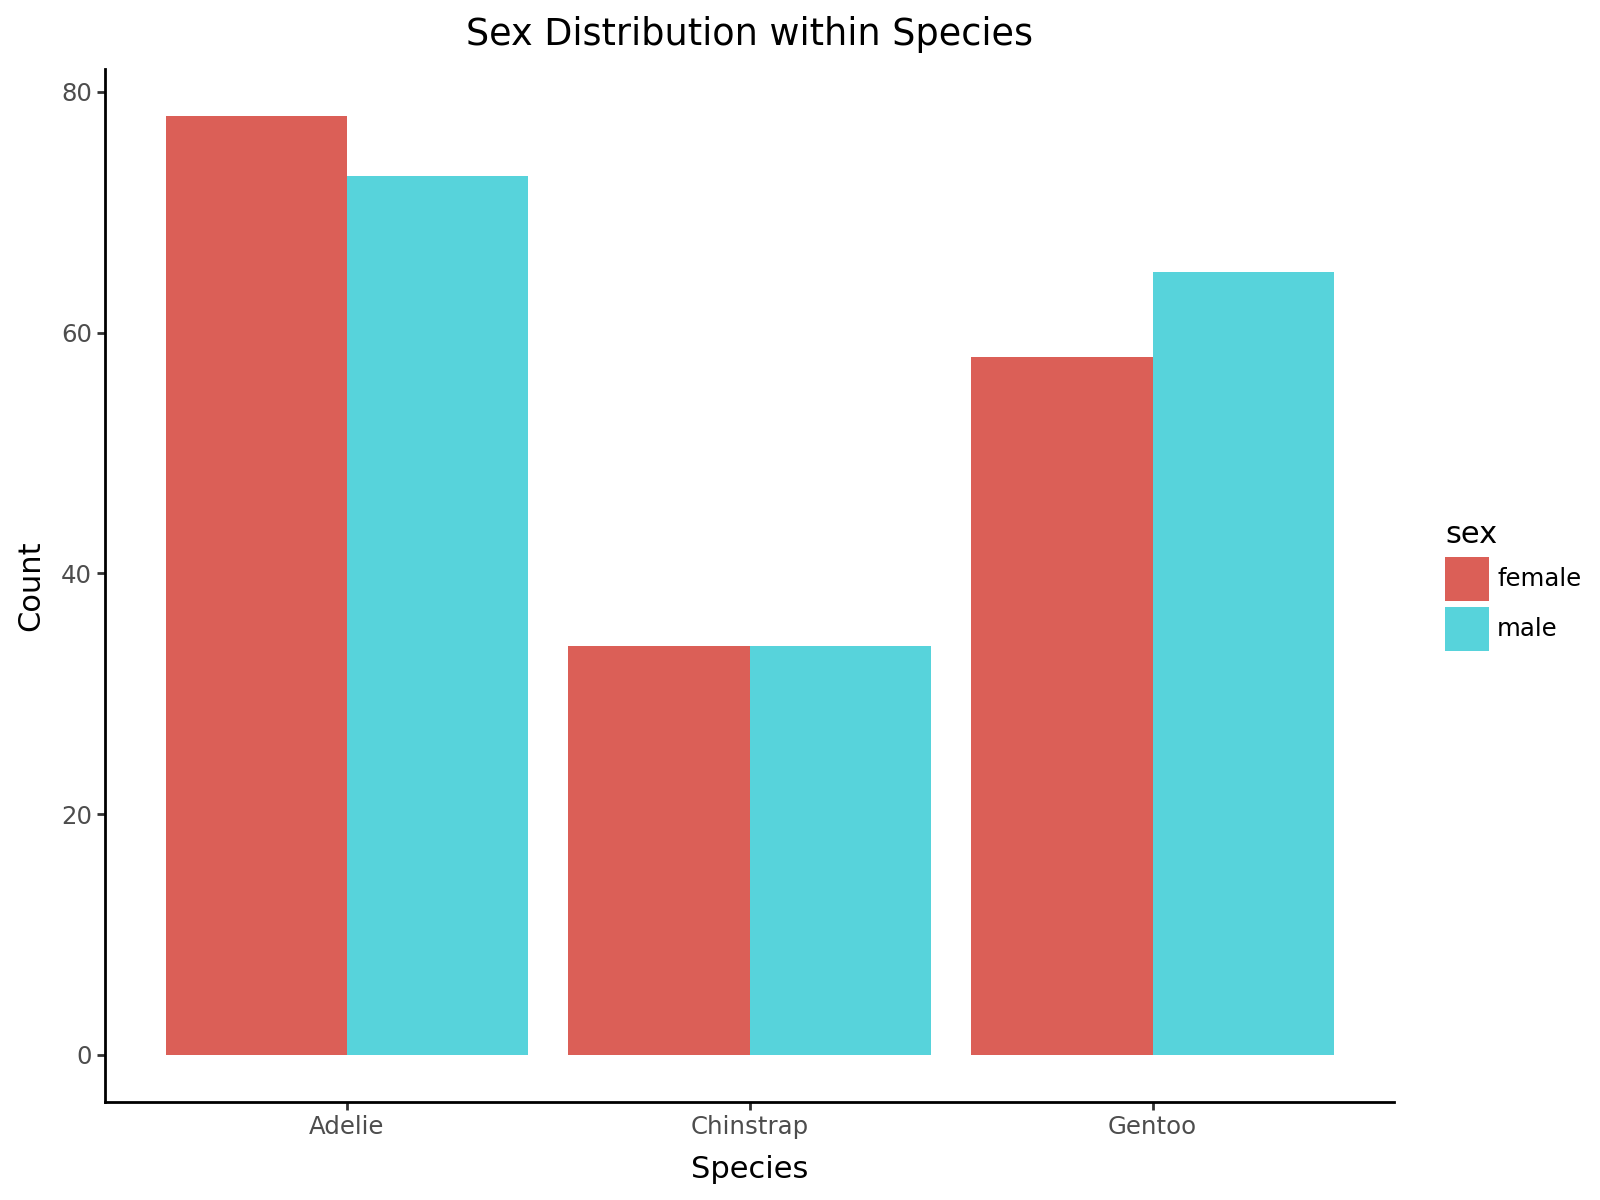

In [237]:

# Grouped bar chart
bar_plot = (
    ggplot(penguins, aes(x='species', fill='sex'))
    + geom_bar(position='dodge')
    + labs(
        title='Sex Distribution within Species',
        x='Species',
        y='Count'
    )
    + theme_classic()
    + theme(figure_size=(8, 6))
)

# Afficher le graphique
bar_plot.show()


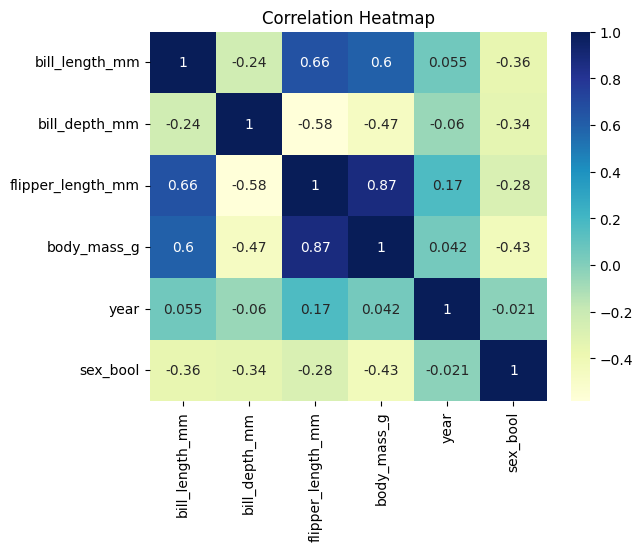

In [238]:
correlated_num_value = penguins.corr(numeric_only=True)
heat_map = sns.heatmap(correlated_num_value, cmap="YlGnBu", annot=True)
heat_map.set_title("Correlation Heatmap")
plt.show()


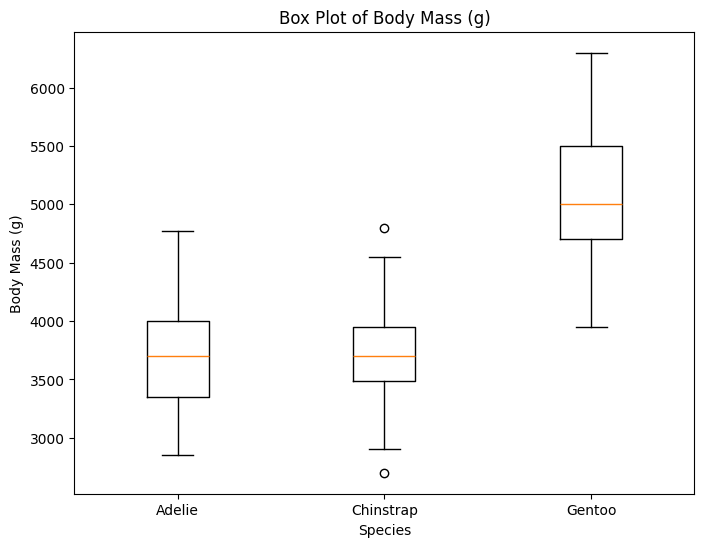

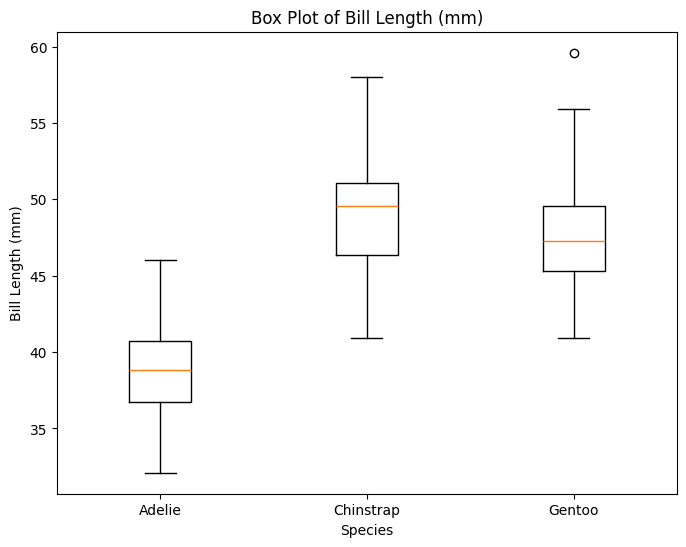

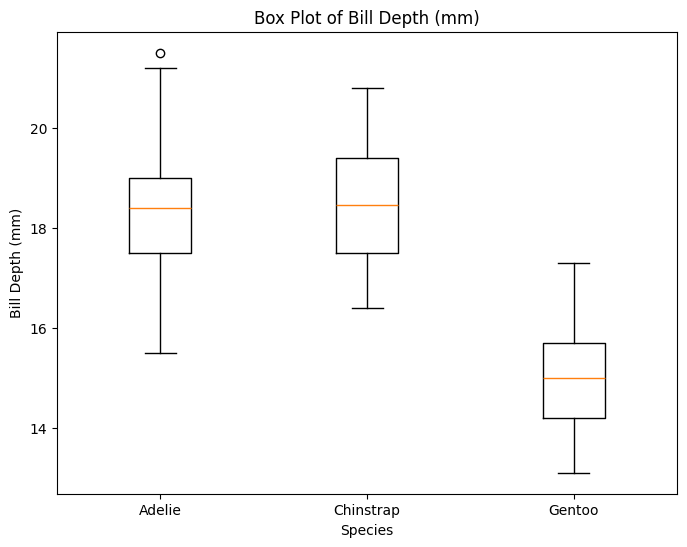

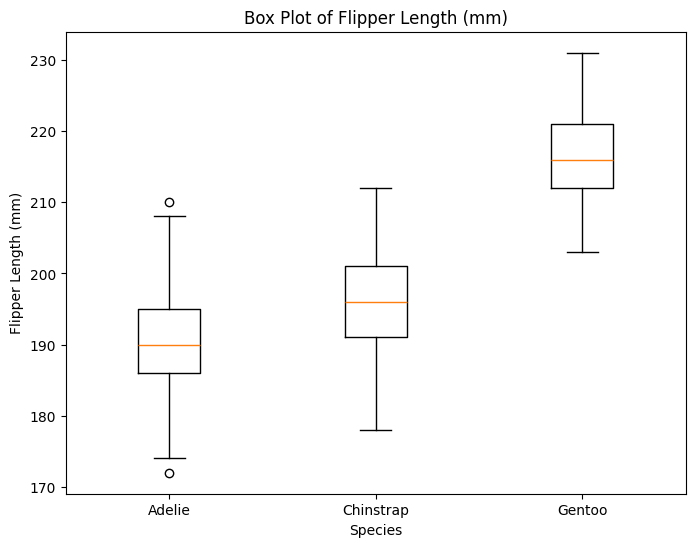

In [239]:
import matplotlib.pyplot as plt

# Liste des variables à tracer
variables = [
    ('body_mass_g', 'Body Mass (g)'),
    ('bill_length_mm', 'Bill Length (mm)'),
    ('bill_depth_mm', 'Bill Depth (mm)'),
    ('flipper_length_mm', 'Flipper Length (mm)')
]

# Créer un boxplot pour chaque variable
for var, ylabel in variables:
    grouped = penguins.groupby('species')[var]
    data = [group for _, group in grouped]

    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=grouped.groups.keys())
    plt.title(f"Box Plot of {ylabel}")
    plt.ylabel(ylabel)
    plt.xlabel("Species")
    plt.show()


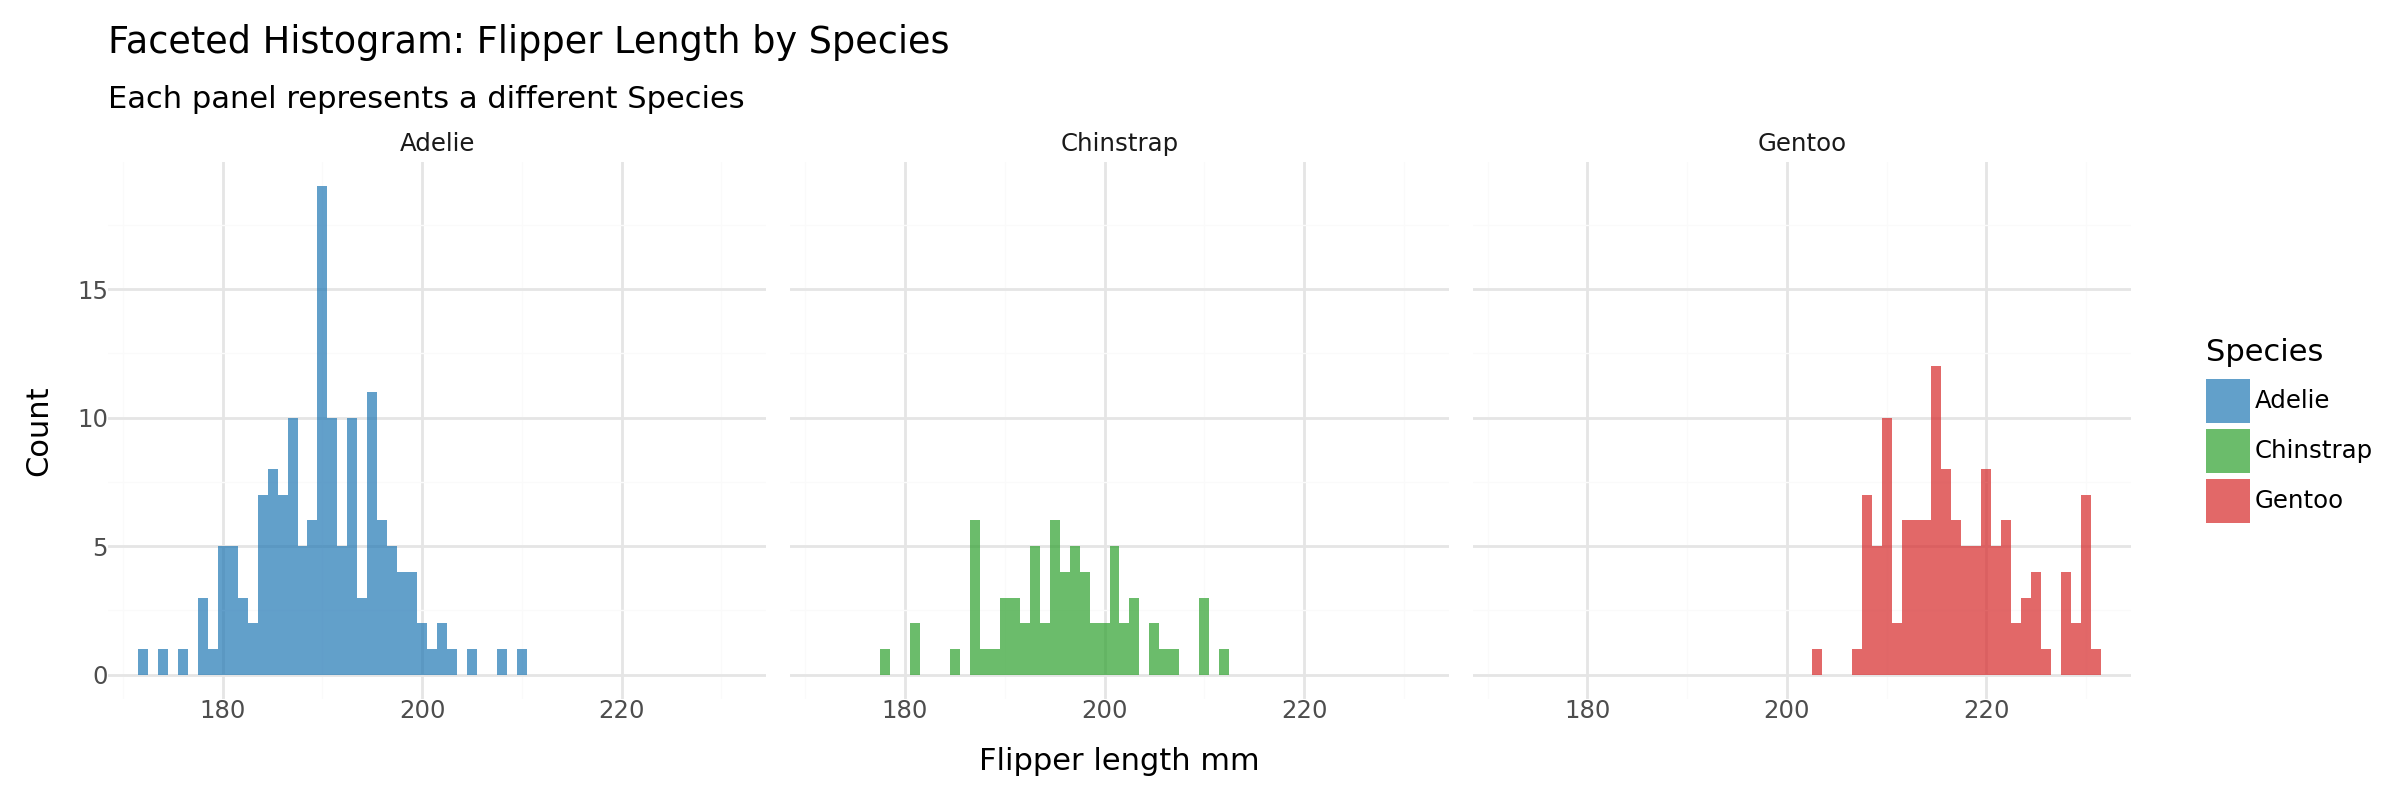

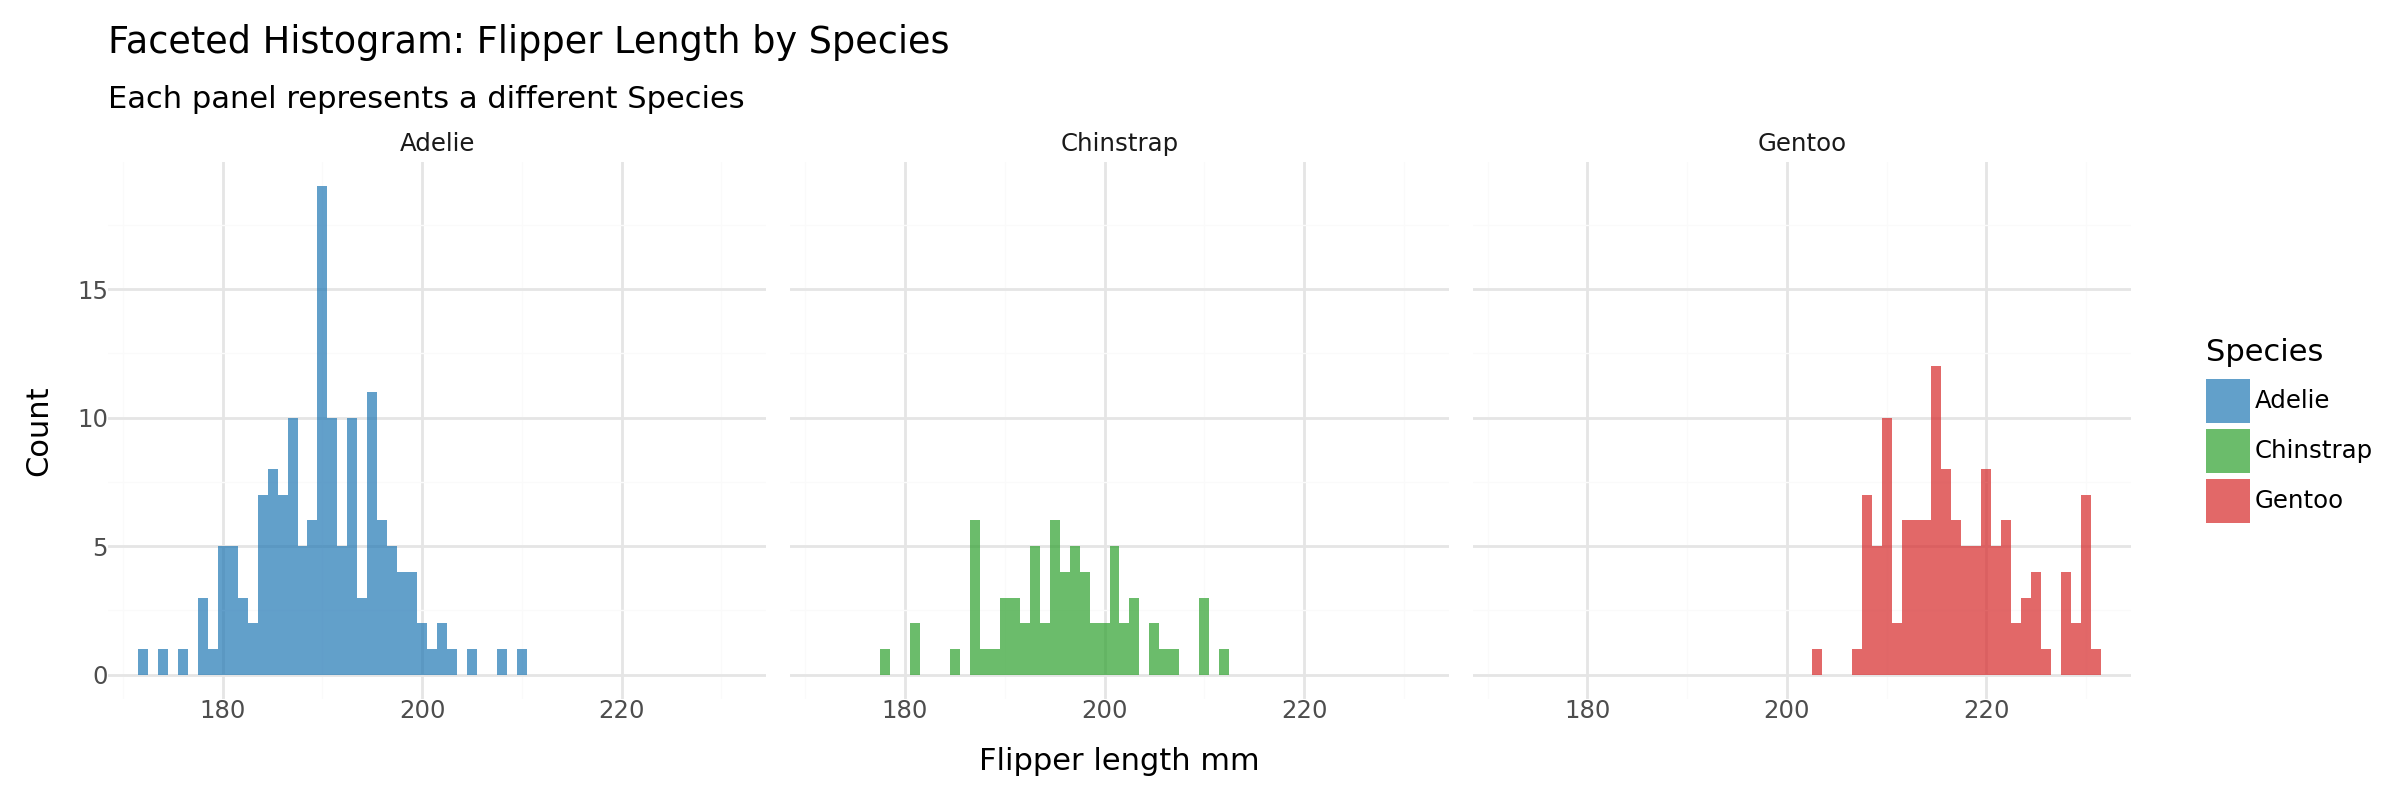

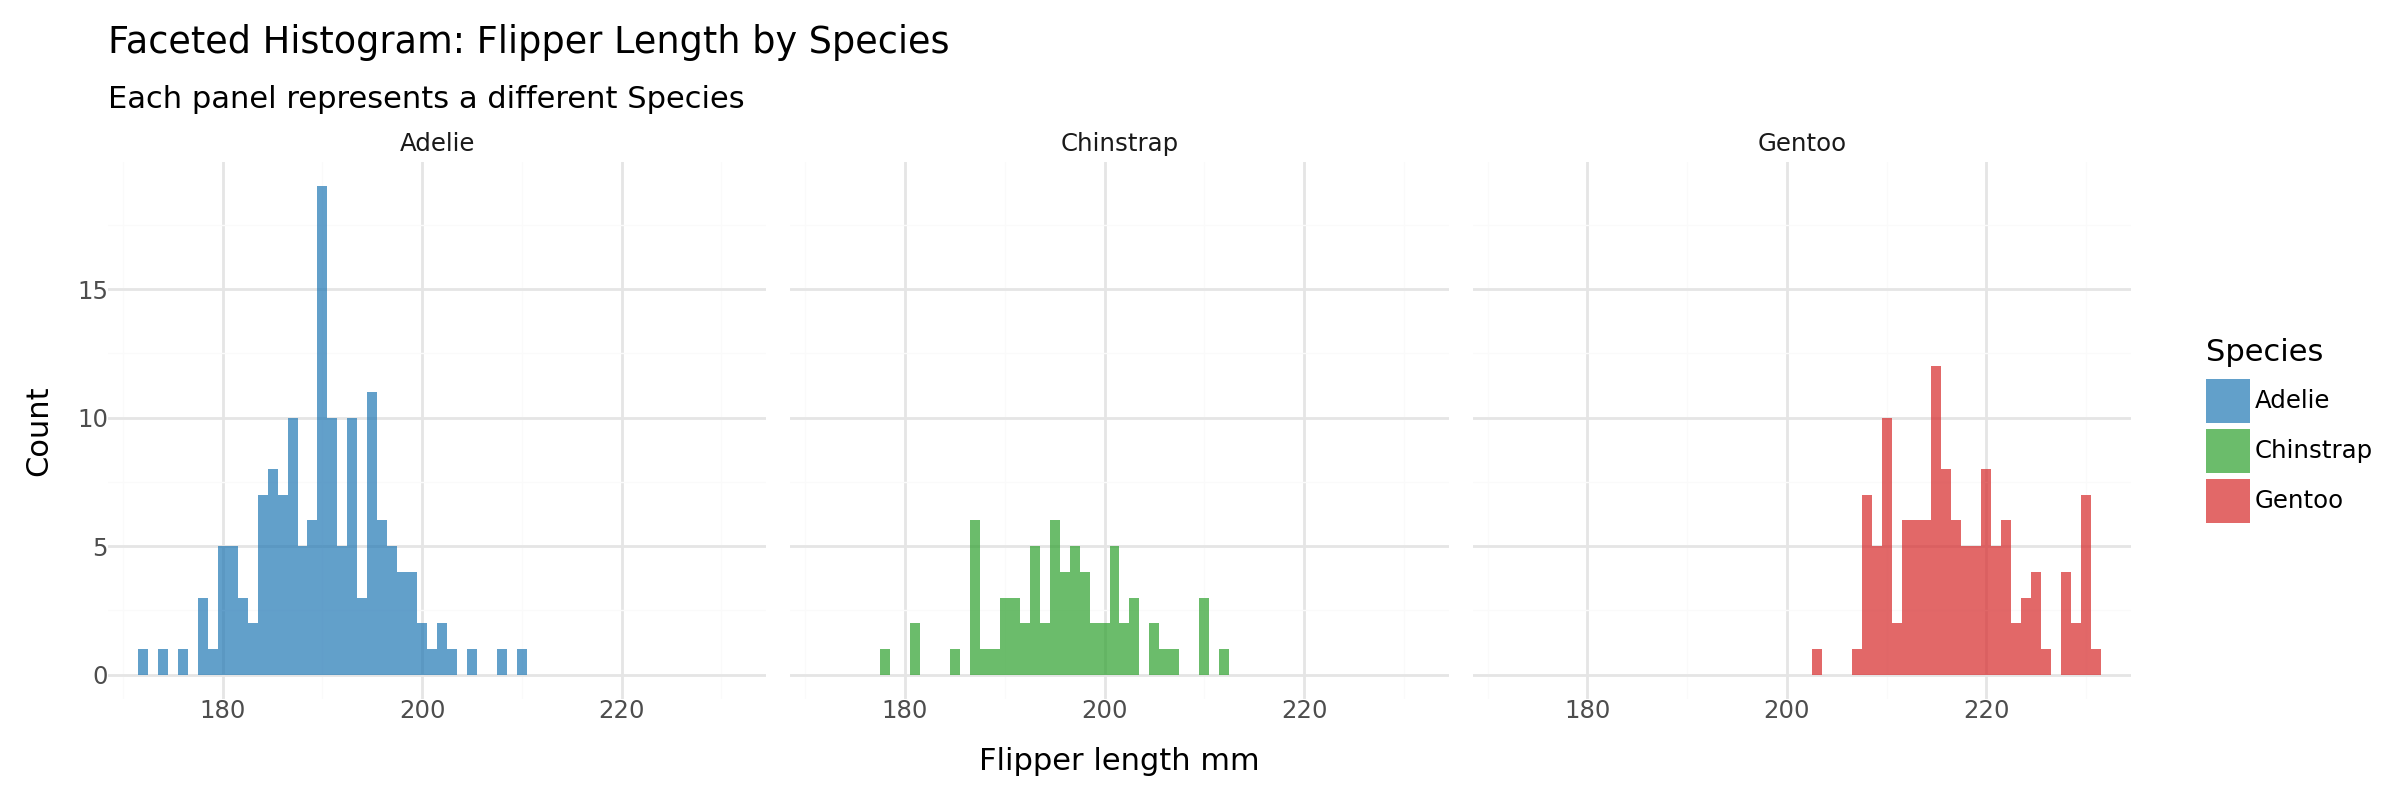

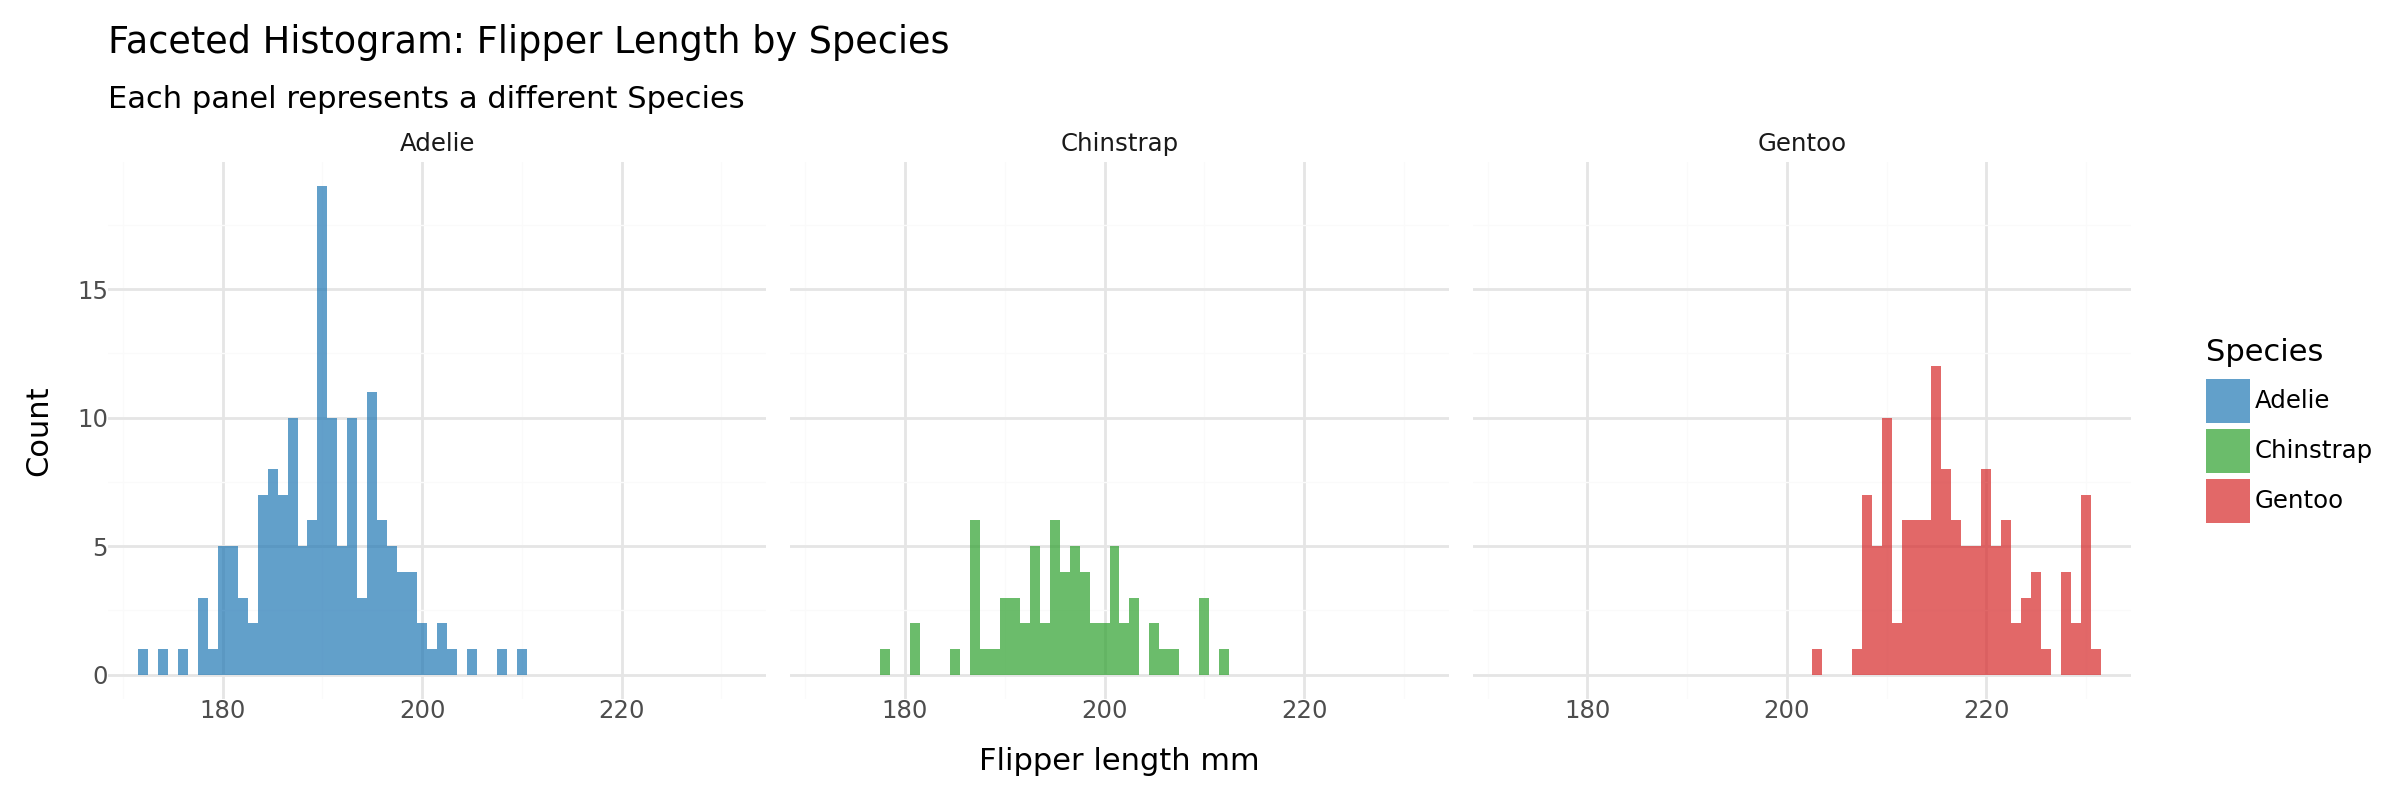

In [240]:

for var, ylabel in variables:
  histogram_plot = (ggplot(penguins, aes(x='flipper_length_mm', fill='species'))+
                 geom_histogram(binwidth=1, alpha=0.7, position='identity') +
                 facet_wrap('species', ncol=3) +
                 theme_minimal() +
                 theme(figure_size=(12, 4))+
                 labs(title="Faceted Histogram: Flipper Length by Species ",
                      subtitle="Each panel represents a different Species",
                      x="Flipper length mm",
                      y="Count",
                      fill="Species") +
                 scale_fill_manual(values=["#1f77b4", "#2ca02c", "#d62728"]))
  histogram_plot.show()

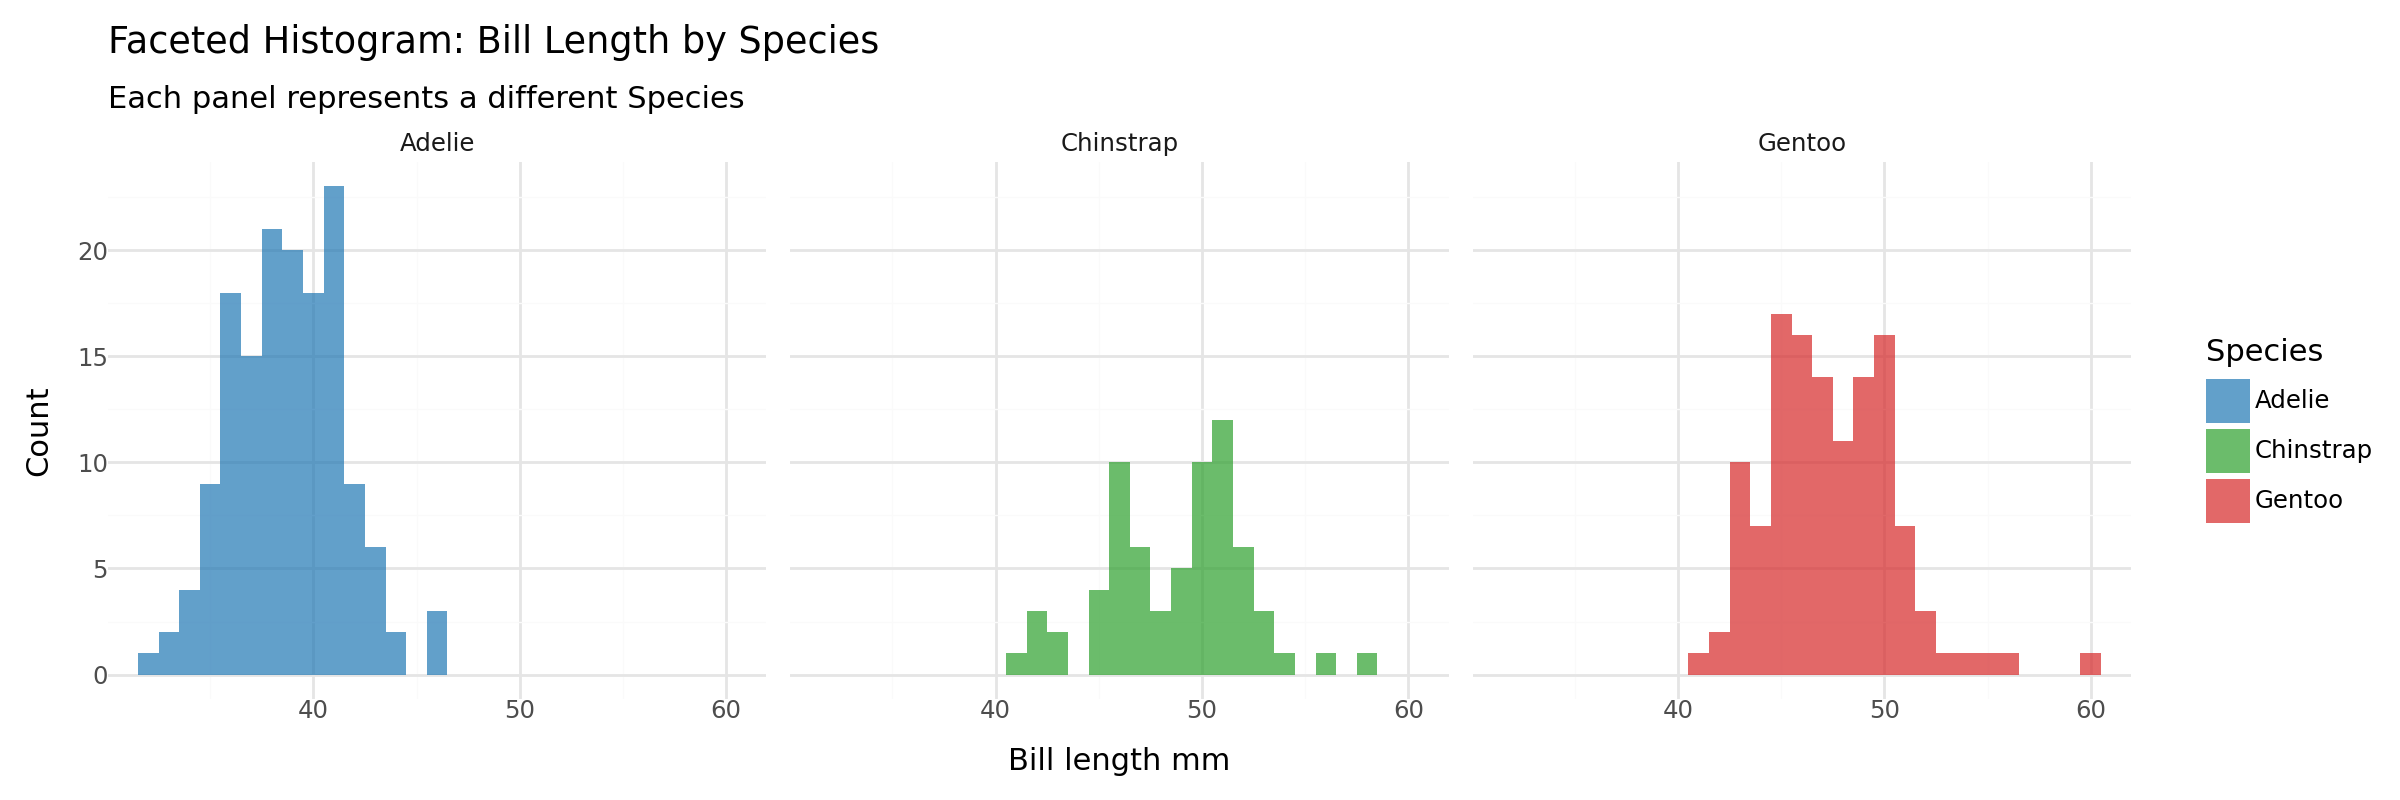

In [241]:


histogram_plot = (ggplot(penguins, aes(x='bill_length_mm', fill='species')) +
                 geom_histogram(binwidth=1, alpha=0.7, position='identity') +
                 facet_wrap('species', ncol=3) +
                 theme_minimal() +
                 theme(figure_size=(12, 4)) +
                 labs(title="Faceted Histogram: Bill Length by Species ",
                      subtitle="Each panel represents a different Species",
                      x="Bill length mm",
                      y="Count",
                      fill="Species") +
                 scale_fill_manual(values=["#1f77b4", "#2ca02c", "#d62728"]))
histogram_plot.show()

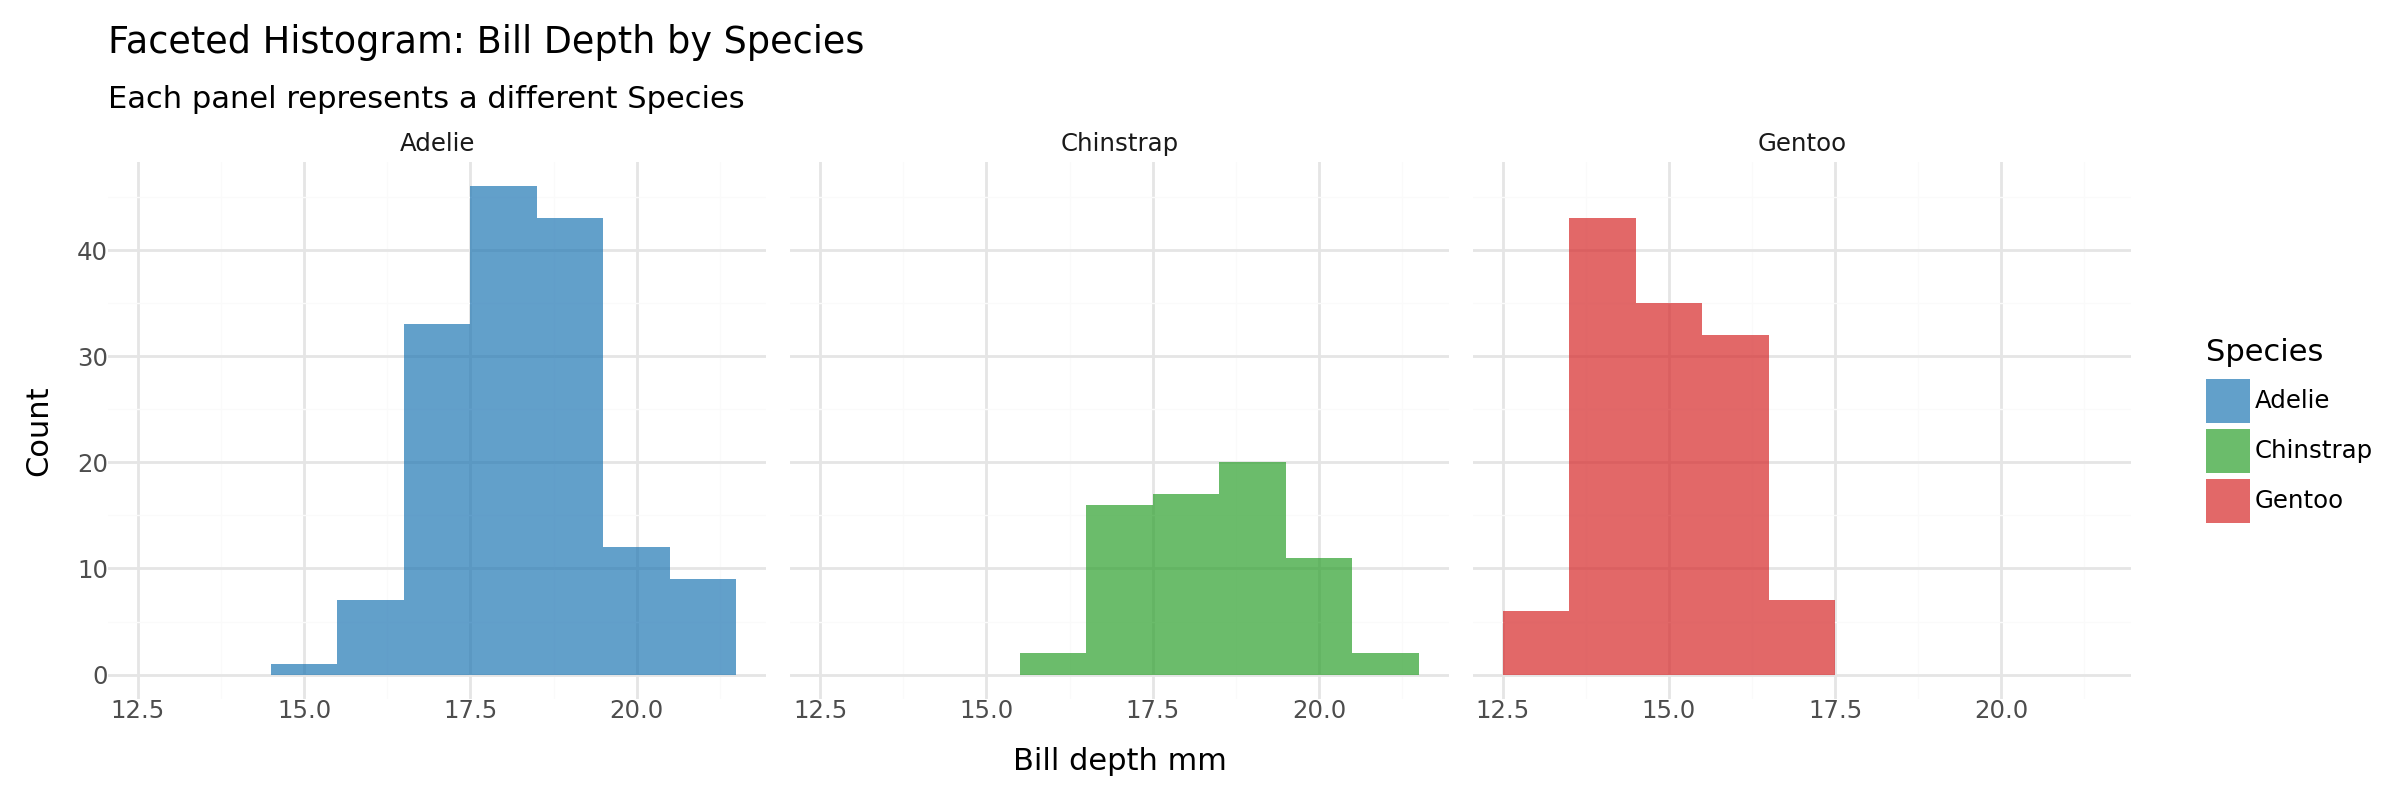

In [242]:
histogram_plot = (ggplot(penguins, aes(x='bill_depth_mm', fill='species')) +
                 geom_histogram(binwidth=1, alpha=0.7, position='identity') +
                 facet_wrap('species', ncol=3) +
                 theme_minimal() +
                 theme(figure_size=(12, 4)) +
                 labs(title="Faceted Histogram: Bill Depth by Species ",
                      subtitle="Each panel represents a different Species",
                      x="Bill depth mm",
                      y="Count",
                      fill="Species") +
                 scale_fill_manual(values=["#1f77b4", "#2ca02c", "#d62728"]))
histogram_plot.show()

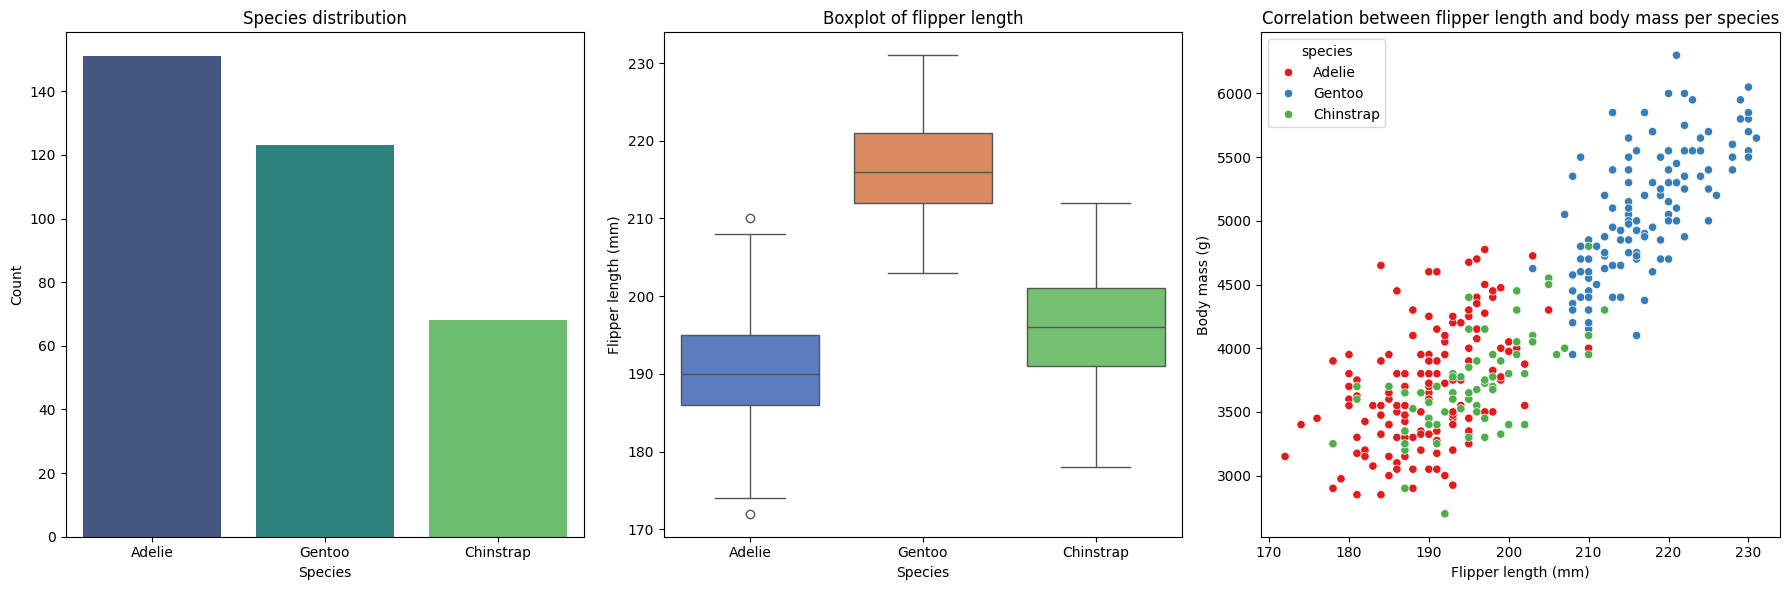

In [243]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(data=penguins, x='species', hue='species', palette='viridis', ax=axes[0])
axes[0].set_title("Species distribution")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Count")

sns.boxplot(data=penguins, x='species', y='flipper_length_mm',hue='species',palette='muted', ax=axes[1])
axes[1].set_title("Boxplot of flipper length")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Flipper length (mm)")

sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set1', ax=axes[2])
axes[2].set_title("Correlation between flipper length and body mass per species")
axes[2].set_xlabel("Flipper length (mm)")
axes[2].set_ylabel("Body mass (g)")
plt.tight_layout()
plt.show()

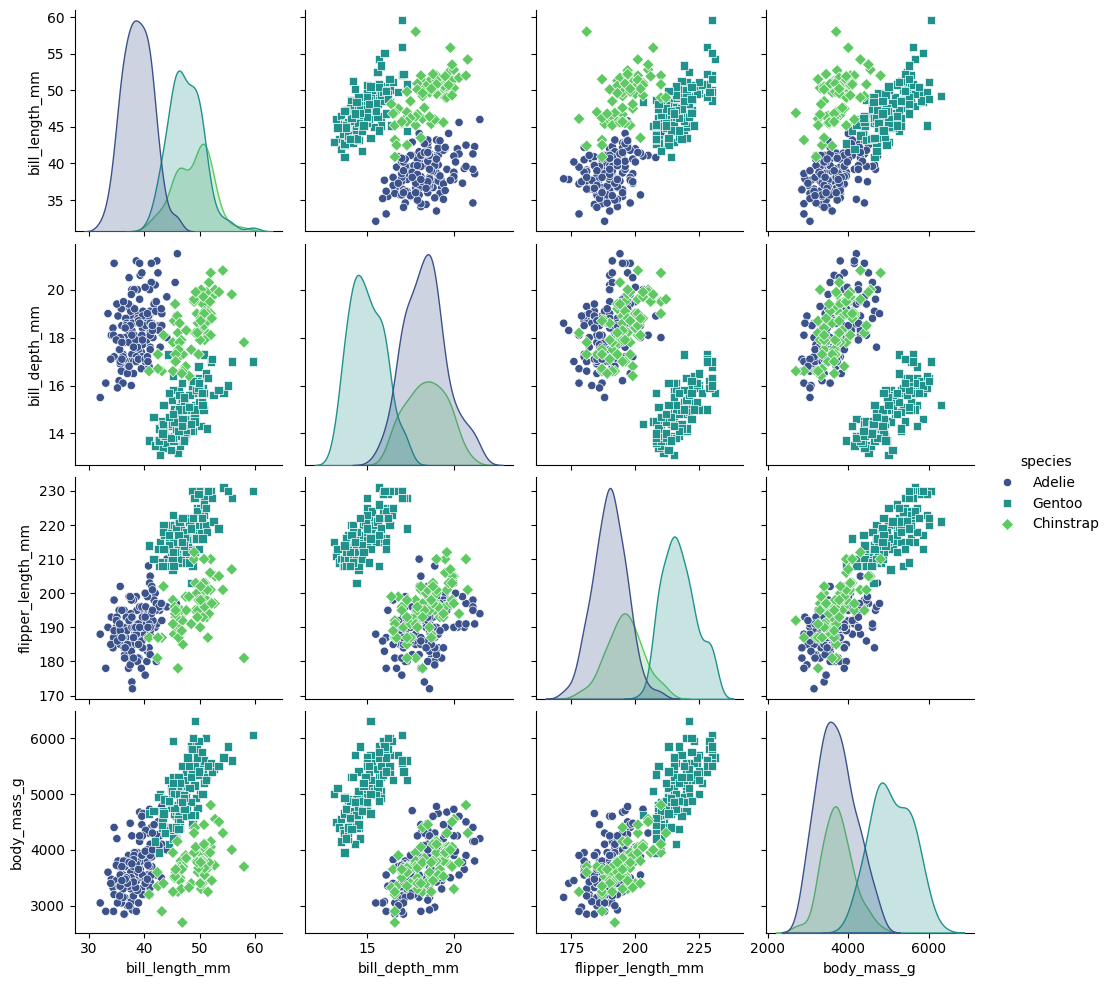

In [244]:
columns_to_include = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.pairplot(
    penguins[columns_to_include + ['species']],
    hue='species',
    markers=["o", "s", "D"],  # Différents marqueurs pour les espèces
    palette='viridis'
)
plt.show()
